In [1]:
!pip install numpy
!pip install tensorflow
!pip install scikit-learn

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/30
375/375 [==============================] - 30s 70ms/step - loss: 0.6487 - accuracy: 0.7659 - val_loss: 0.4128 - val_accuracy: 0.8472
Epoch 2/30
375/375 [==============================] - 15s 41ms/step - loss: 0.4579 - accuracy: 0.8344 - val_loss: 0.3952 - val_accuracy: 0.8579
Epoch 3/30
375/375 [==============================] - 17s 47ms/step - loss: 0.4222 - accuracy: 0.8469 - val_loss: 0.3573 - val_accuracy: 0.8670
Epoch 4/30
375/375 [==============================] - 15s 41ms/step - loss: 0.3944 - accuracy: 0.8577 - val_loss: 0.3600 - val_accuracy: 0.8691
Epoch 5/30
375/375 [==============================] - 15s 41ms/step - loss: 0.3809 - accuracy: 0.8610 - val_loss: 0.3478 - val_accuracy: 0.8714
Epoch 6/30
375/375 [==============================] - 15s 41ms/step - loss: 0.3675 - accuracy: 0.8667 - val_loss: 0.3498 - val_accuracy: 0.8738
Epoch 7/30
375/375 [==============================] - 17s 45ms/step - los

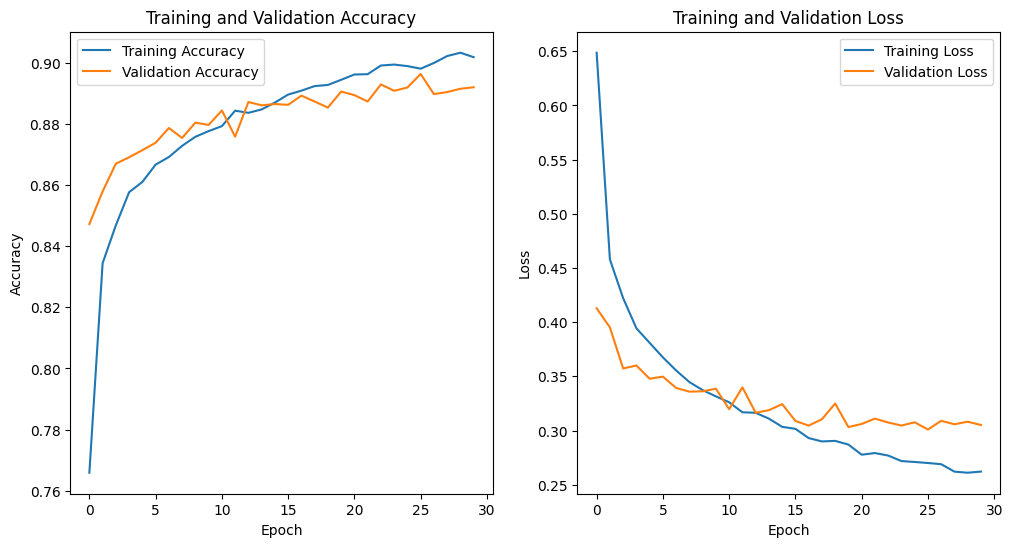

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Завантаження д.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворення д.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Визначення архітектури моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Навчання
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2, verbose=1)

# Оцінка
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Візуалізація кривих навчання
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()